In [15]:
import matplotlib as mpl
mpl.use('Agg')
%matplotlib inline
import sys
import numpy as  np
import os
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread
import json
from lightjob.cli import load_db
from astroML.correlation import two_point
from sklearn.metrics import euclidean_distances

In [3]:
db = load_db()

c6e17d58bea257734704fd2196e48f81


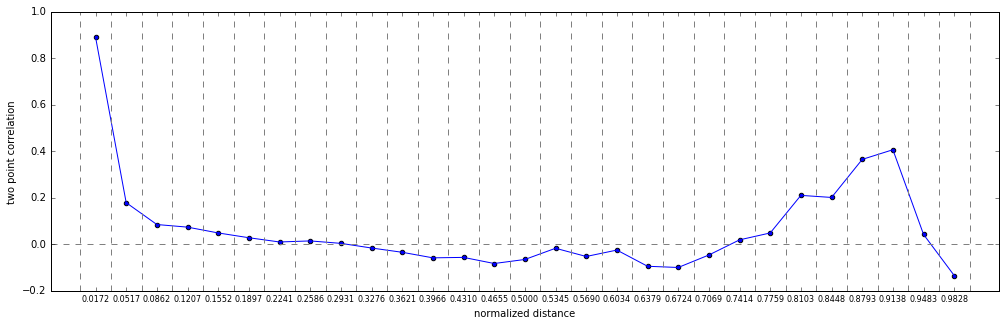

In [191]:
J = db.jobs_with(state='success', type='generation', summary='c6e17d58bea257734704fd2196e48f81')
for j in J:
    id_ = j['summary']
    jref_s = j['content']['model_summary']
    jref = db.get_job_by_summary(jref_s)
    filename = '../jobs/results/{}/tsne_input.csv'.format(id_)
    if not os.path.exists(filename):
        continue
    df = pd.read_csv(filename)
    X = df[['x', 'y']].values
    dist = euclidean_distances(X)
    dist_min, dist_max = dist.min(), dist.max()
    nb = 30
    width = (dist_max - dist_min) / nb
    c = 0
    bins = np.linspace(dist_min - c, dist_max + c, nb)
    
    t = two_point(X, bins, method='landy-szalay')

    bins = (bins - bins.min()) / (bins.max() - bins.min())
    pt = (bins[0:-1] + bins[1:])/2.
    fig = plt.figure(figsize=(17, 5))
    plt.xticks(pt, fontsize=8)
    #plt.bar(pt, t, alpha=0.5, align='center', width=width)
    plt.plot(pt, t)
    plt.scatter(pt, t)
    plt.axhline(0, linestyle='dashed', c='gray')
    for b in bins:
        plt.axvline(x=b, color='gray', linestyle='dashed')
    plt.xlabel('normalized distance')
    plt.ylabel('two point correlation')
    plt.show()
    plt.close(fig)
    break